In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("spam.csv",encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.rename(columns={'v1':"target",'v2':'text'},inplace=True)

In [8]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

In [15]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<Axes: ylabel='count'>

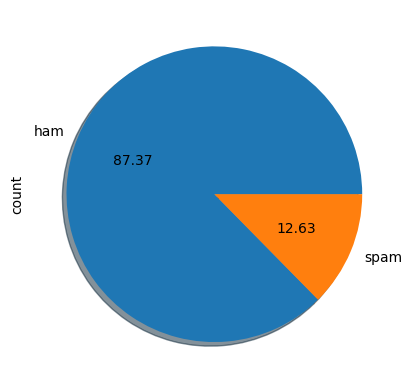

In [19]:
df['target'].value_counts().plot(kind='pie',autopct='%0.2f',labels=['ham','spam'],shadow=True)

In [20]:
import nltk

In [21]:
df['no_of_char']=df['text'].apply(len)

In [22]:
df['no_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df['no_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df

,target,text,no_of_char,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [25]:
df[['no_of_char','no_of_words','no_of_sentences']].describe()

,no_of_char,no_of_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==0][['no_of_char','no_of_words','no_of_sentences']].describe()

,no_of_char,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==1][['no_of_char','no_of_words','no_of_sentences']].describe()

,no_of_char,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns

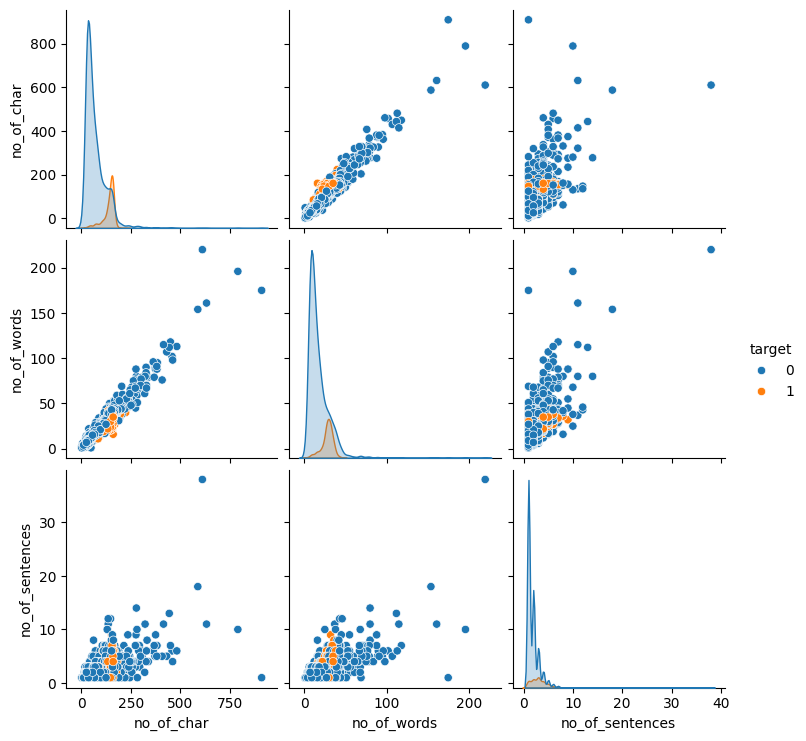

In [29]:
sns.pairplot(df,hue='target')

In [30]:
df.iloc[:,[0,2,3,4]].corr()

,target,no_of_char,no_of_words,no_of_sentences
target,1.000000,0.384717,0.262912,0.263939
no_of_char,0.384717,1.000000,0.965760,0.624139
no_of_words,0.262912,0.965760,1.000000,0.679971
no_of_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

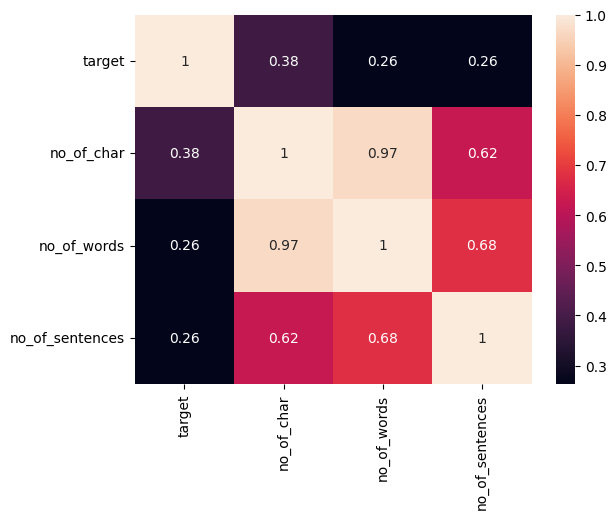

In [31]:
sns.heatmap(df.iloc[:,[0,2,3,4]].corr(),annot=True)

**Data preprocessing**

In [32]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer 

In [35]:
ps=PorterStemmer()

In [36]:
def transform_of_text(text): # transforming the data by using tokenization string manipulation, stop words removal , punctions removal and stemming
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
        

In [37]:
df['transformed_text']=df['text'].apply(transform_of_text)

In [38]:
df.head()

,target,text,no_of_char,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud 

In [40]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black') #this is used to visualize the words

In [41]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

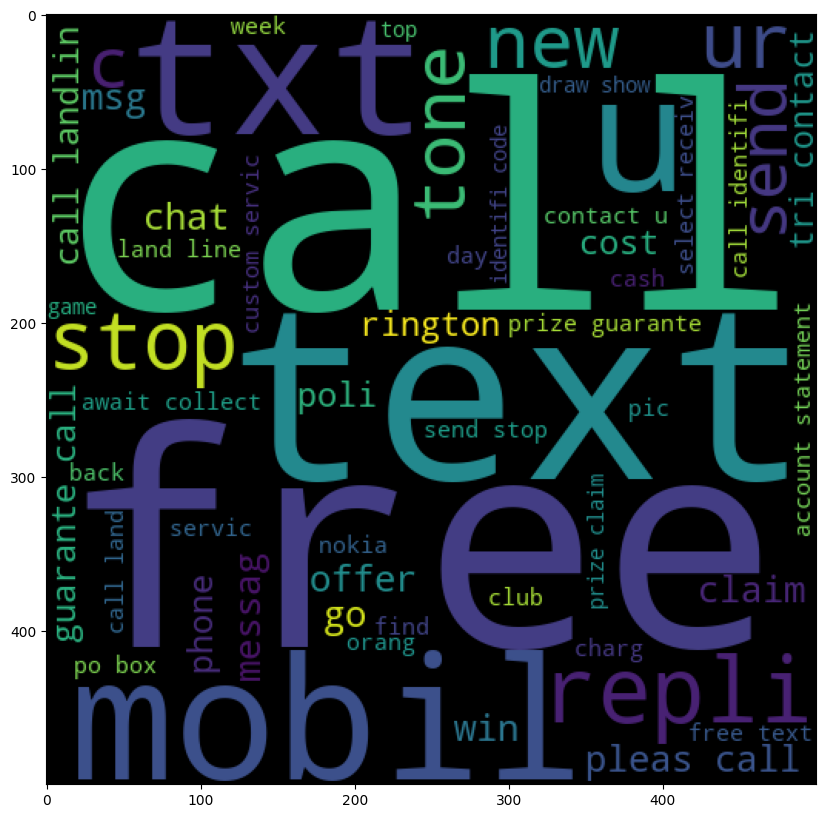

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [43]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=""))

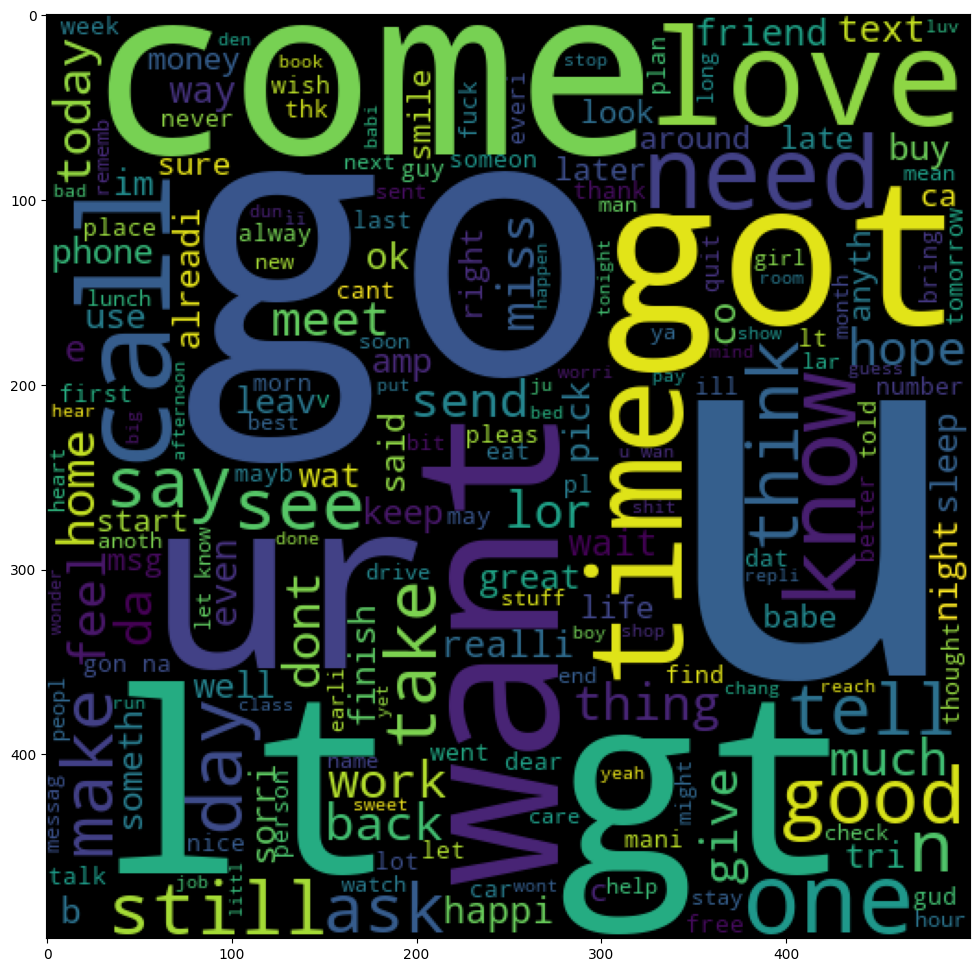

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(ham_wc)

In [45]:
#coustom function to find the most occuring words in the spame and hame
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
#library to create dictionary  of words with it count
from collections import Counter 

In [47]:
common=pd.DataFrame((Counter(spam_corpus).most_common(30))) #most common words top 30

In [48]:
common

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


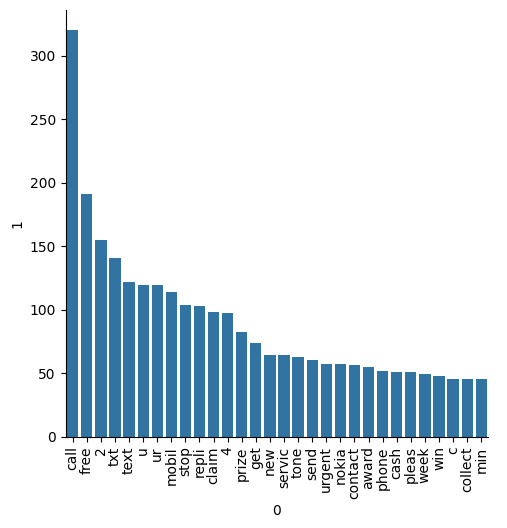

In [49]:
sns.catplot(data=common,x=common[0],y=common[1],kind='bar')
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [52]:
common1=pd.DataFrame((Counter(ham_corpus).most_common(30)))

In [53]:
common1

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


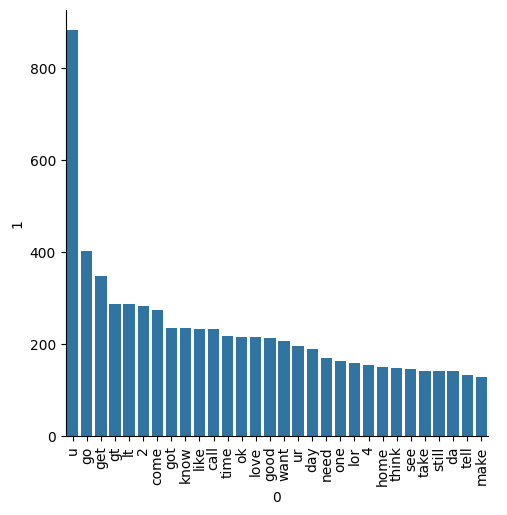

In [54]:
sns.catplot(data=common,x=common1[0],y=common1[1],kind='bar')
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df.head(10)

,target,text,no_of_char,no_of_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


**Model building**

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer #to convert in numericel form

In [57]:
tfidf=TfidfVectorizer()

In [58]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
X.shape

(5169, 6708)

In [60]:
y=df['target'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [64]:
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score

In [65]:
mnb=MultinomialNB()
bnb=BernoulliNB()

**model1: MultinomialNB**

In [66]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [67]:
y_pred1=mnb.predict(X_test) ##prediction for model1

**accuracy_score for model1**

In [68]:
print('accuracy_score for model1:-',(accuracy_score(y_test,y_pred1)))

accuracy_score for model1:- 0.9593810444874274


In [69]:
print(confusion_matrix(y_test,y_pred1))

[[896   0]
 [ 42  96]]


**precision score for model1**

In [70]:
print('precision_score for model1:-',precision_score(y_test,y_pred1))

precision_score for model1:- 1.0


**model2:BernoulliNB**

In [71]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [72]:
y_pred2=bnb.predict(X_test) ##prediction for model2

**accuracy_score for model2**

In [73]:
print("accuracy_score for model2:-",(accuracy_score(y_test,y_pred2)))

accuracy_score for model2:- 0.9700193423597679


In [74]:
print('precision_score for model2:-',precision_score(y_test,y_pred2))

precision_score for model2:- 0.9734513274336283


In [75]:
print("confusion matrix:-\n",confusion_matrix(y_test,y_pred2))

confusion matrix:-
 [[893   3]
 [ 28 110]]


**model3:LogisticRegression**

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr=LogisticRegression()

In [78]:
lr.fit(X_train,y_train)

LogisticRegression()

In [79]:
y_pred3=lr.predict(X_test) ##prediction for model3

**accuracy score and precision score for model3**

In [80]:
print("accuracy score for logistic regression:-",accuracy_score(y_test,y_pred3))

accuracy score for logistic regression:- 0.9477756286266924


In [81]:
print("precision score for logistic regression:-",precision_score(y_test,y_pred3))

precision score for logistic regression:- 0.9883720930232558


In [82]:
print("confusion matrix :-\n",confusion_matrix(y_test,y_pred3))

confusion matrix :-
 [[895   1]
 [ 53  85]]


**model4:support vector machine**

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [84]:
svc=SVC()

In [85]:
svc.fit(X_train,y_train)

SVC()

In [86]:
y_pred4=svc.predict(X_test) #prediction for model4

**accuracy score for model4**

In [87]:
print("accuracy score for svc:-",accuracy_score(y_test,y_pred4))

accuracy score for svc:- 0.9661508704061895


**precision score for model4**

In [88]:
print("precision score for model4:-",precision_score(y_test,y_pred4))

precision score for model4:- 0.9813084112149533


In [89]:
print("confusion matrix :-\n",confusion_matrix(y_test,y_pred4))

confusion matrix :-
 [[894   2]
 [ 33 105]]


**model5:kNN**

In [90]:
from sklearn.neighbors  import KNeighborsClassifier

In [98]:
scores=[]
precision=[]
for i in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred5=knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred5))
    precision.append(precision_score(y_test,y_pred5))

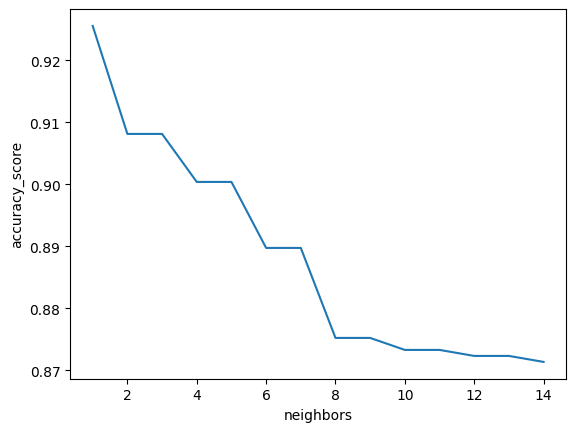

In [97]:
plt.plot(range(1,15),scores)
plt.xlabel("neighbors")
plt.ylabel("accuracy_score")
plt.show()

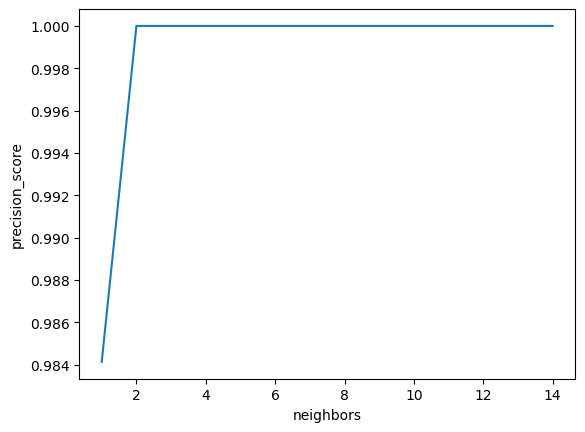

In [99]:
plt.plot(range(1,15),precision)
plt.xlabel("neighbors")
plt.ylabel("precision_score")
plt.show()

In [100]:
knn= KNeighborsClassifier(n_neighbors=2)

In [101]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [104]:
y_pred5_1=knn.predict(X_test)

**accuracy score,precision and confusion matrix  for kNN**

In [107]:
print("accuracy score:-",accuracy_score(y_test,y_pred5_1))
print("precision score:-",precision_score(y_test,y_pred5_1))
print("confusion matrix:-\n",confusion_matrix(y_test,y_pred5_1))

accuracy score:- 0.9081237911025145
precision score:- 1.0
confusion matrix:-
 [[896   0]
 [ 95  43]]


**model6:-Decision Tree**

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [110]:
dt=DecisionTreeClassifier()

In [111]:
para={'criterion': ["gini", "entropy", "log_loss"],
     'splitter':["best", "random"],
    'max_depth':[1,2,3,4,5,7,6,None],
    'max_features':[1,2,3,4,5,6,7,None] }

In [112]:
grid=GridSearchCV(estimator=dt,param_grid=para,scoring='accuracy',cv=3,n_jobs=-1,verbose=2)

In [113]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 7, 6, None],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, None],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

**best parameters after performing hyperparameter tunning**

In [116]:
print("best parameters:-\n",grid.best_params_)

best parameters:-
 {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'splitter': 'random'}


In [132]:
dt_best=grid.best_estimator_

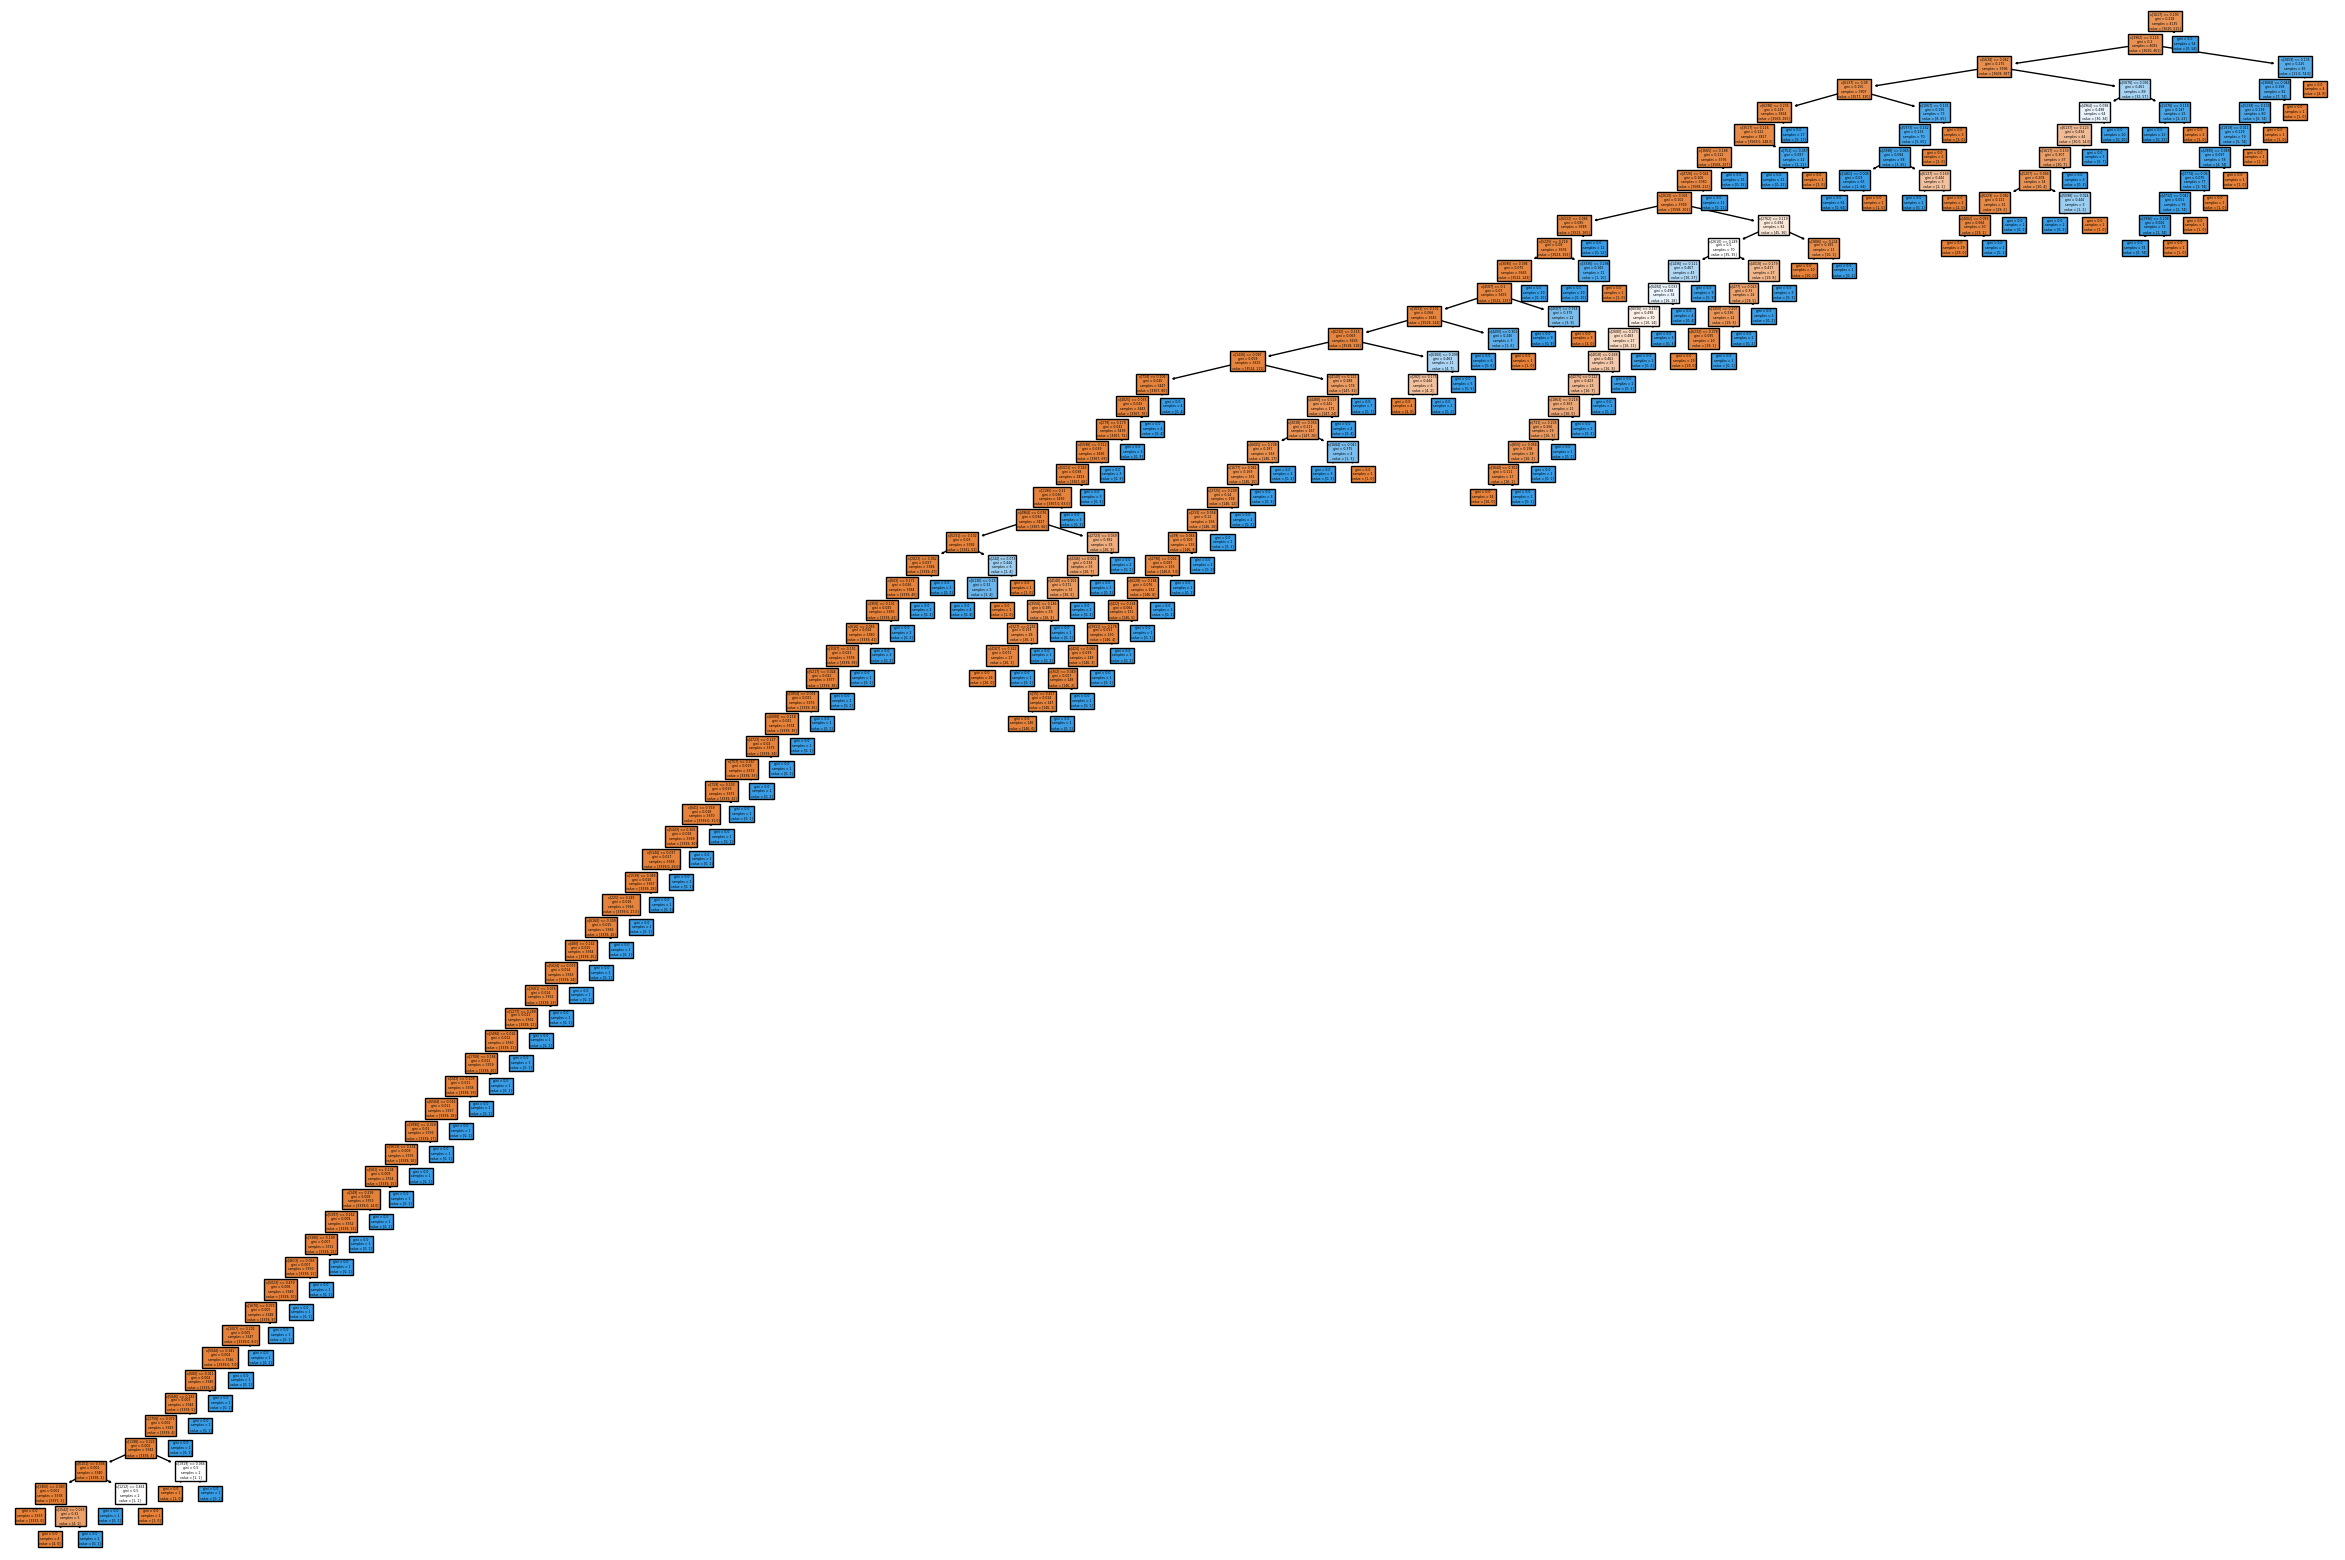

In [135]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(dt_best,filled=True)
plt.show()

In [117]:
y_pred6=grid.predict(X_test)

**accuracy and precision score for decision tree**

In [122]:
print("accuracy score:-",accuracy_score(y_test,y_pred6))
print("pecision score:-",precision_score(y_test,y_pred6))

accuracy score:- 0.9468085106382979
pecision score:- 0.8429752066115702


In [130]:
d={'Algorithms':['MultinomialNB','BernoulliNB','LogisticRegression','support vector machine','KNN','Decision Tree'],
   'accuracy':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5_1),accuracy_score(y_test,y_pred6)],
  'precision':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2),precision_score(y_test,y_pred3),precision_score(y_test,y_pred4),precision_score(y_test,y_pred5_1),precision_score(y_test,y_pred6)]}
performance=pd.DataFrame(d,index=[1,2,3,4,5,6])

In [131]:
performance

,Algorithms,accuracy,precision
1,MultinomialNB,0.959381,1.000000
2,BernoulliNB,0.970019,0.973451
3,LogisticRegression,0.947776,0.988372
4,support vector machine,0.966151,0.981308
5,KNN,0.908124,1.000000
6,Decision Tree,0.946809,0.842975
